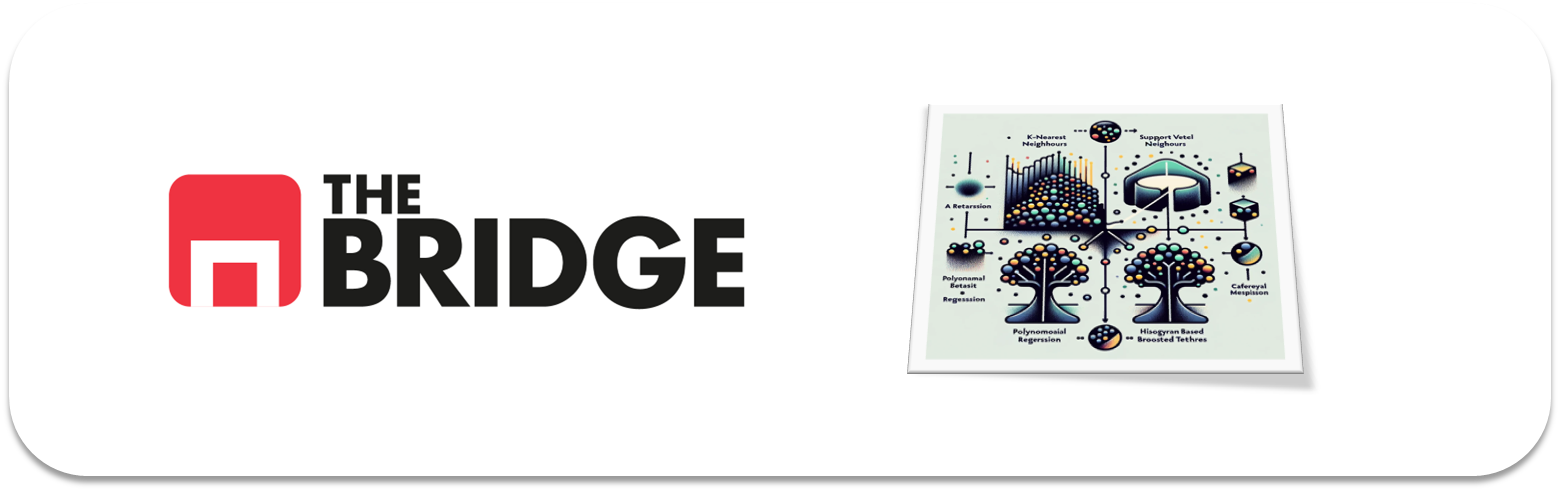

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [142]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

| Nombre de Variable                          | Descripción                                                                                             | Tipo       |
|---------------------------------------------|---------------------------------------------------------------------------------------------------------|------------|
| SeriousDlqin2yrs                           | Persona experimentó morosidad de 90 días o más en el pasado                                               | S/N        |
| RevolvingUtilizationOfUnsecuredLines        | Saldo total en tarjetas de crédito y líneas de crédito personales, excepto bienes raíces y sin deudas a plazos como préstamos de automóviles, dividido por la suma de los límites de crédito | porcentaje |
| edad                                      | Edad del prestatario en años                                                                            | entero     |
| NumberOfTime30-59DaysPastDueNotWorse        | Número de veces que el prestatario ha estado entre 30 y 59 días moroso, pero no peor en los últimos 2 años | entero     |
| DebtRatio                                 | Pagos mensuales de deuda, pensión alimenticia, costos de vida divididos por ingreso bruto mensual        | porcentaje |
| IngresoMensual                            | Ingreso mensual                                                                                        | real       |
| NumberOfOpenCreditLinesAndLoans           | Número de préstamos abiertos (a plazos como préstamo de automóvil o hipoteca) y líneas de crédito (por ejemplo, tarjetas de crédito) | entero     |
| NumberOfTimes90DaysLate                   | Número de veces que el prestatario ha estado 90 días o más moroso                                       | entero     |
| NumeroPrestamosInmobiliariosOLíneas        | Número de préstamos hipotecarios y líneas de crédito inmobiliario, incluyendo líneas de crédito con garantía hipotecaria | entero     |
| NumberOfTime60-89DaysPastDueNotWorse        | Número de veces que el prestatario ha estado entre 60 y 89 días moroso, pero no peor en los últimos 2 años | entero     |
| NumberOfDependents                        | Número de dependientes en la familia, excluyéndose a sí mismos (cónyuge, hijos, etc.)                    | entero     |

In [39]:
df = pd.read_csv("./data/credit_npo.csv")

In [40]:
df.info()
#vemos que hay 2 variables con nulos, MonthlyIncome y NumberOfDependents. Vamos a darle el valor UKN a donde tengamos nulos por los momentos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [41]:
df_sin_null = df.copy()
df_sin_null["MonthlyIncome"] = df_sin_null.MonthlyIncome.fillna("UNK")
df_sin_null["NumberOfDependents"] = df_sin_null.NumberOfDependents.fillna("UNK")

In [32]:
df_sin_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         12537 non-null  object 
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12537 non-null  object 
dtypes: float64(2), 

In [33]:
df_sin_null.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [34]:
df_sin_null["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()
#revise el value count de esta feature de manera aleatoria y el 98 no me encaja muy bien, revisare todos los value counts de las variables.

NumberOfTime30-59DaysPastDueNotWorse
0     10500
1      1377
2       401
3       128
4        64
5        23
98       21
6        20
8         2
7         1
Name: count, dtype: int64

In [19]:
categoricas =[
    "SeriousDlqin2yrs",
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfOpenCreditLinesAndLoans",
    "NumberOfTimes90DaysLate",
    "NumberOfTime60-89DaysPastDueNotWorse",
    "NumberOfDependents"]

In [35]:
for col in df_sin_null:
    print(df_sin_null[col].value_counts())

#NumberOfOpenCreditLinesAndLoans y NumberOfTimes90DaysLate las considerare numericas. A mayores el 98 aparece en varias columnas y no parece un error.

SeriousDlqin2yrs
0    11673
1      864
Name: count, dtype: int64
RevolvingUtilizationOfUnsecuredLines
0.000000    878
1.000000    875
0.141225      2
0.986401      2
0.001667      2
           ... 
0.263378      1
0.153868      1
0.478791      1
0.056225      1
0.252566      1
Name: count, Length: 10764, dtype: int64
age
47     347
49     325
48     324
50     304
53     302
      ... 
95       7
94       3
96       1
97       1
101      1
Name: count, Length: 78, dtype: int64
NumberOfTime30-59DaysPastDueNotWorse
0     10500
1      1377
2       401
3       128
4        64
5        23
98       21
6        20
8         2
7         1
Name: count, dtype: int64
DebtRatio
0.000000    430
4.000000     24
1.000000     19
2.000000     17
3.000000     16
           ... 
0.385107      1
0.002012      1
0.312446      1
0.971365      1
0.455357      1
Name: count, Length: 11547, dtype: int64
MonthlyIncome
UNK        721
5000.0     275
4000.0     201
6000.0     186
3000.0     182
          ... 
5281

In [ ]:
categoricas =[
    "SeriousDlqin2yrs",
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfTime60-89DaysPastDueNotWorse",
    "NumberOfDependents"]

In [25]:
numericas = [
    "RevolvingUtilizationOfUnsecuredLines",
    "age",
    "DebtRatio",
    "NumberOfOpenCreditLinesAndLoans",
    "NumberOfTimes90DaysLate",
    "MonthlyIncome",
    "NumberRealEstateLoansOrLines",
]

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

In [ ]:
#Estamos tratando con un problema de clasificacion binaria. Como variable target utilizaremos la variable binaria "SeriousDlqin2yrs" que nos indica 
# si un cliente ha presentado una morosidad de 90 dias o mas en el pasado.

### #1.3
Pinta la distribución de frecuencias del target y coméntala

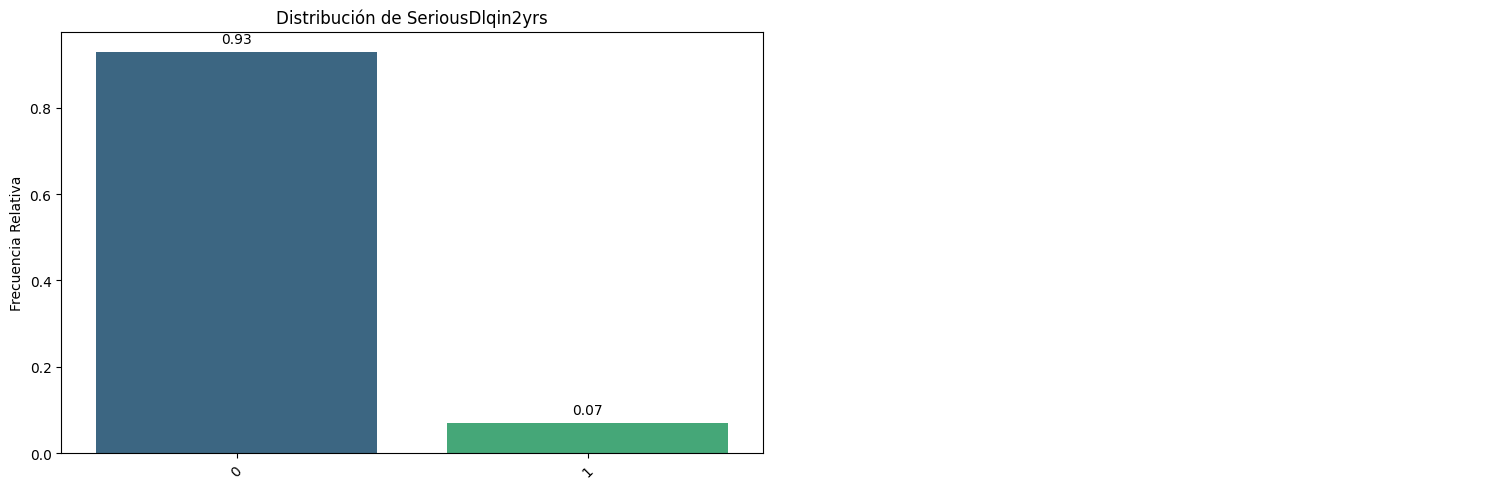

In [117]:
target = ["SeriousDlqin2yrs"]

categoricas =[
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfTime60-89DaysPastDueNotWorse",
    "NumberOfDependents"]
bt.pinta_distribucion_categoricas(df_sin_null, target, relativa=True, mostrar_valores=True)

#podemos ver que la distribucion del target esta muy desbalanceada en favor al 0 (no presenta morosidad)
#la feature monthlyIncome es numerica no nos compensa tratar el dataset con estos valores UKN. Vamos a proceder a eliminar las filas con null para esta columna.
#la variable NumberOfDependents la mantendremos con UKN ya que es categorica.
#eliminamos el target de la lista de categoricas

In [47]:
df_sin_null = df_sin_null[df_sin_null["MonthlyIncome"] != "UNK"]
df_sin_null.info()
#no me queda claro si es correcto o no eliminar esas filas de UNK para la columna numerica.

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  object 
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  object 
dtypes: float64(2), int64

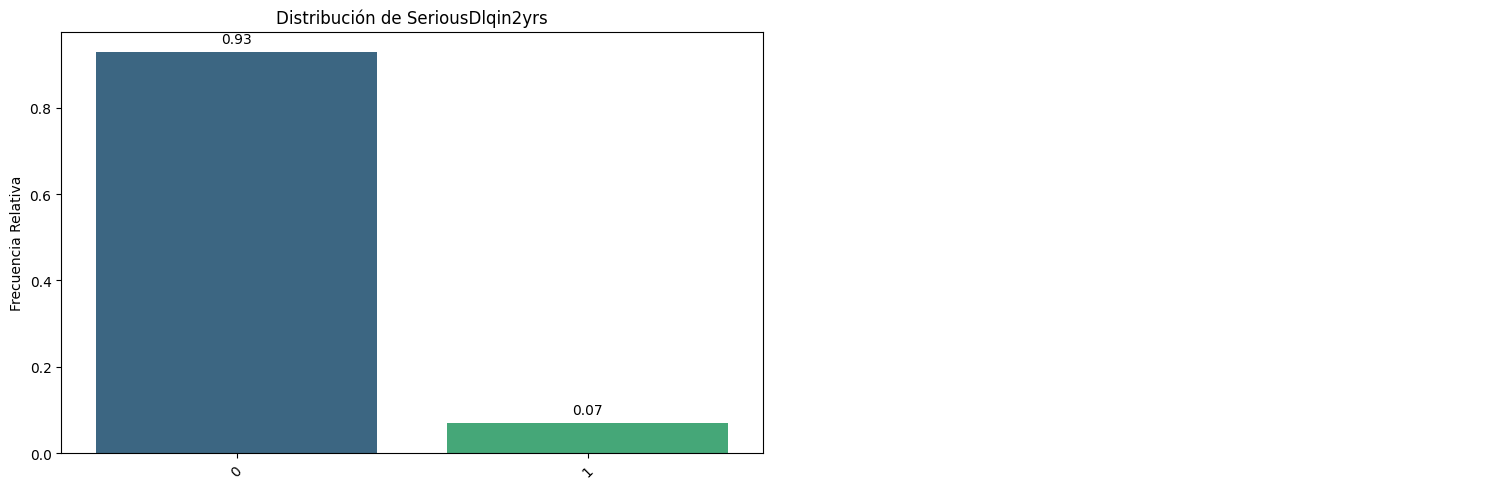

In [118]:
bt.pinta_distribucion_categoricas(df_sin_null, target, relativa=True, mostrar_valores=True)

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [78]:
X = df_sin_null.drop(target, axis = 1)
y = df_sin_null[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
df_corr = X_train.copy()
df_corr[target] = y_train.copy()

In [84]:
np.abs(df_corr.corr()["SeriousDlqin2yrs"]).sort_values(ascending =False)

SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.284084
NumberOfTime30-59DaysPastDueNotWorse    0.126015
NumberOfTimes90DaysLate                 0.125070
age                                     0.107801
NumberOfTime60-89DaysPastDueNotWorse    0.094215
NumberOfDependents                      0.038829
NumberOfOpenCreditLinesAndLoans         0.032472
MonthlyIncome                           0.018163
DebtRatio                               0.001863
NumberRealEstateLoansOrLines            0.001677
Name: SeriousDlqin2yrs, dtype: float64

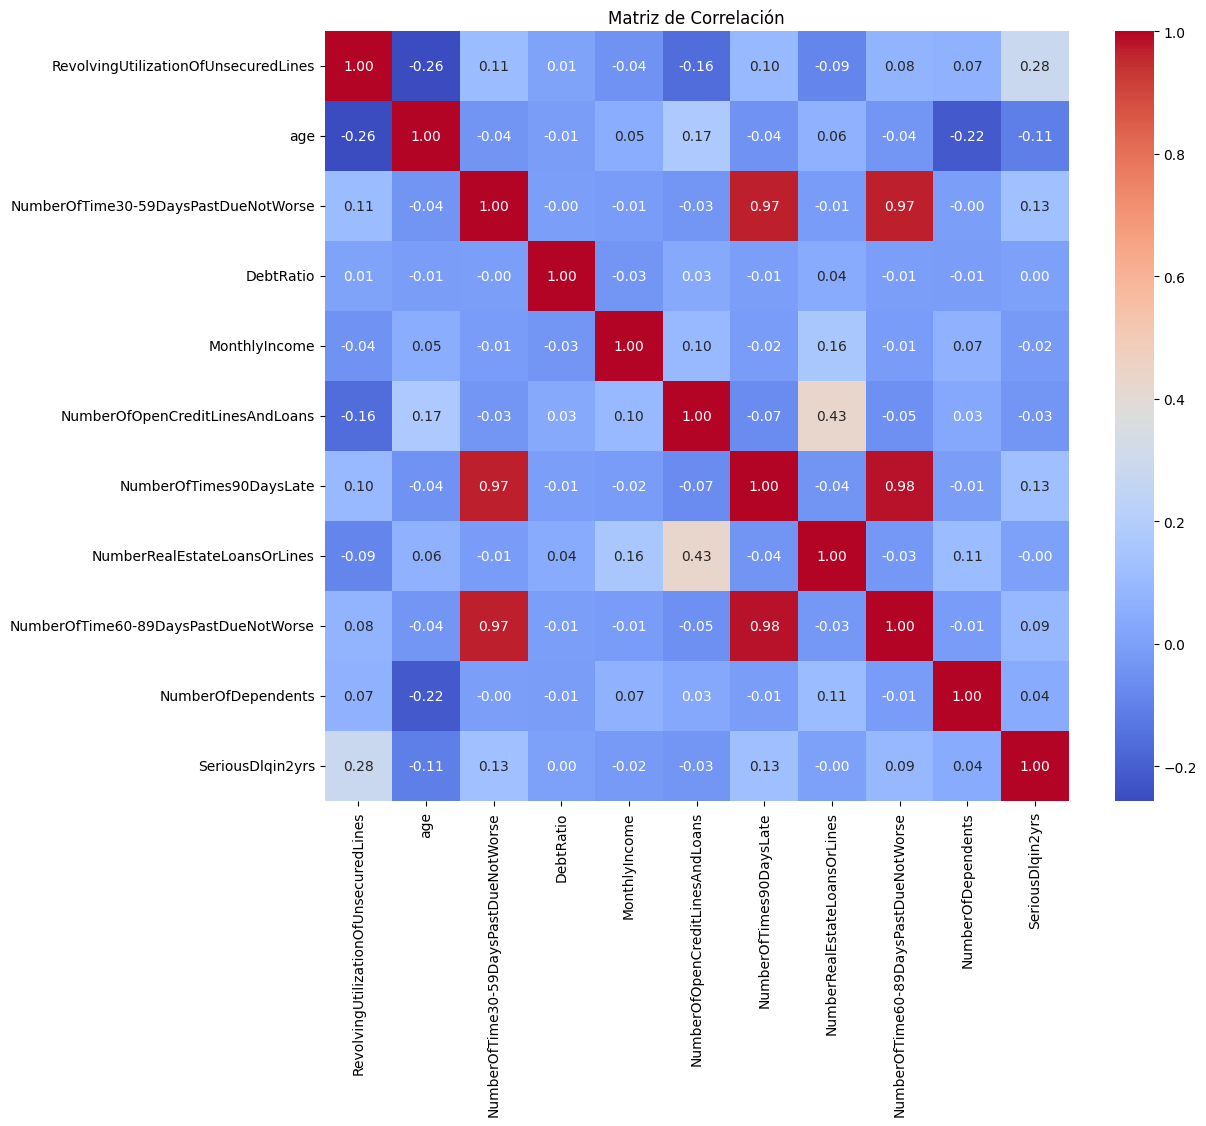

In [87]:
correlation_matrix = df_corr.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [67]:
corr = np.abs(df_corr.corr()["SeriousDlqin2yrs"]).sort_values(ascending =False)
poor_corr = corr[corr<0.05].index.values
df_corr.drop(columns = poor_corr, inplace = True)
#eliminaremos las features que tengan menos de un

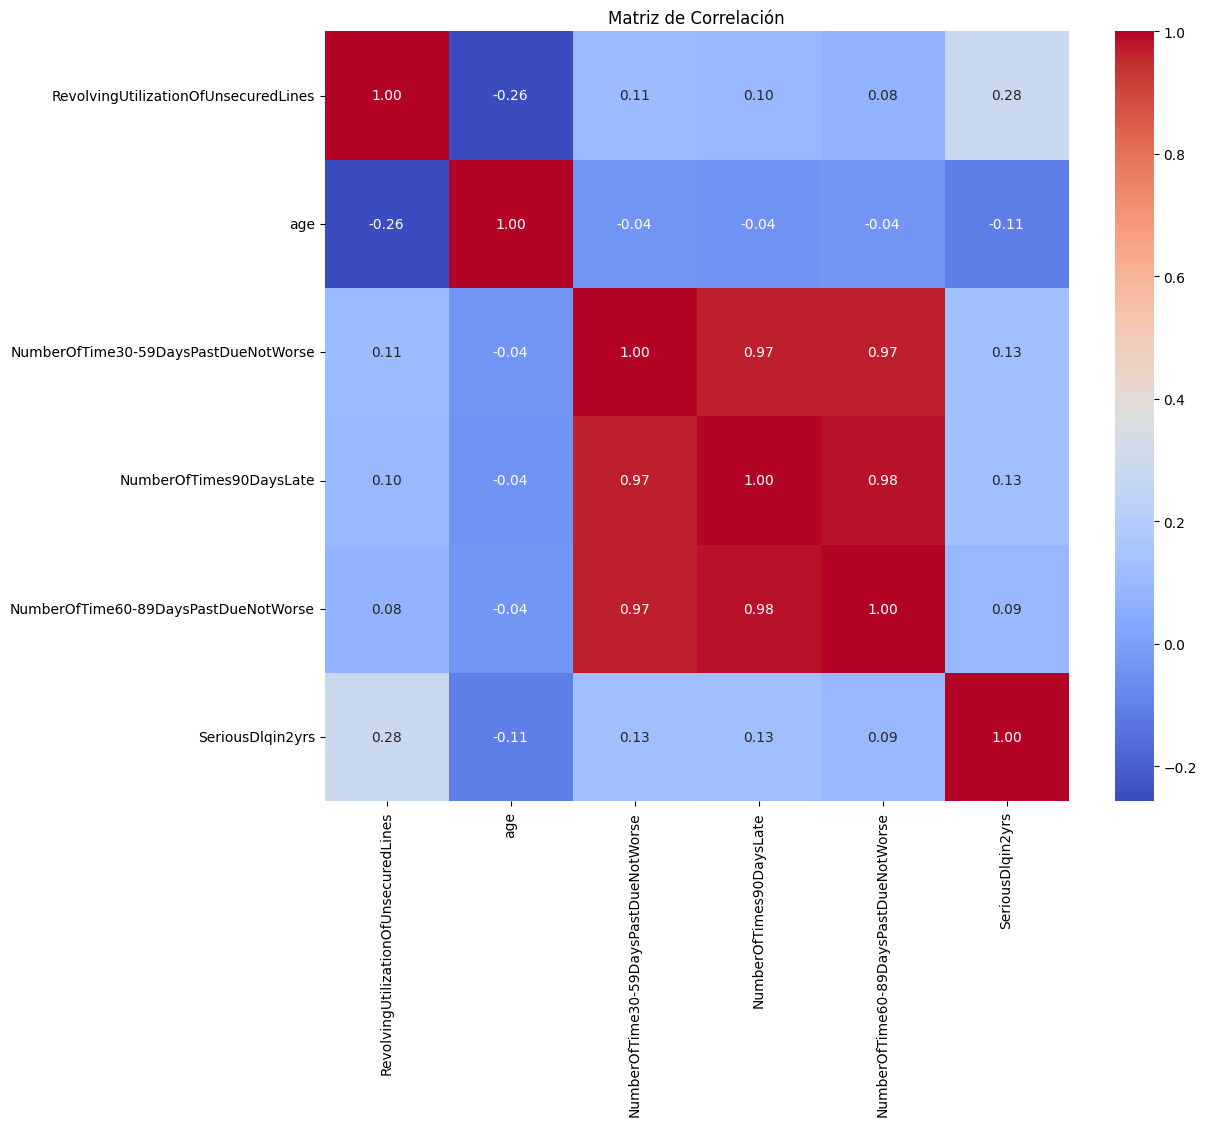

In [68]:
correlation_matrix = df_corr.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

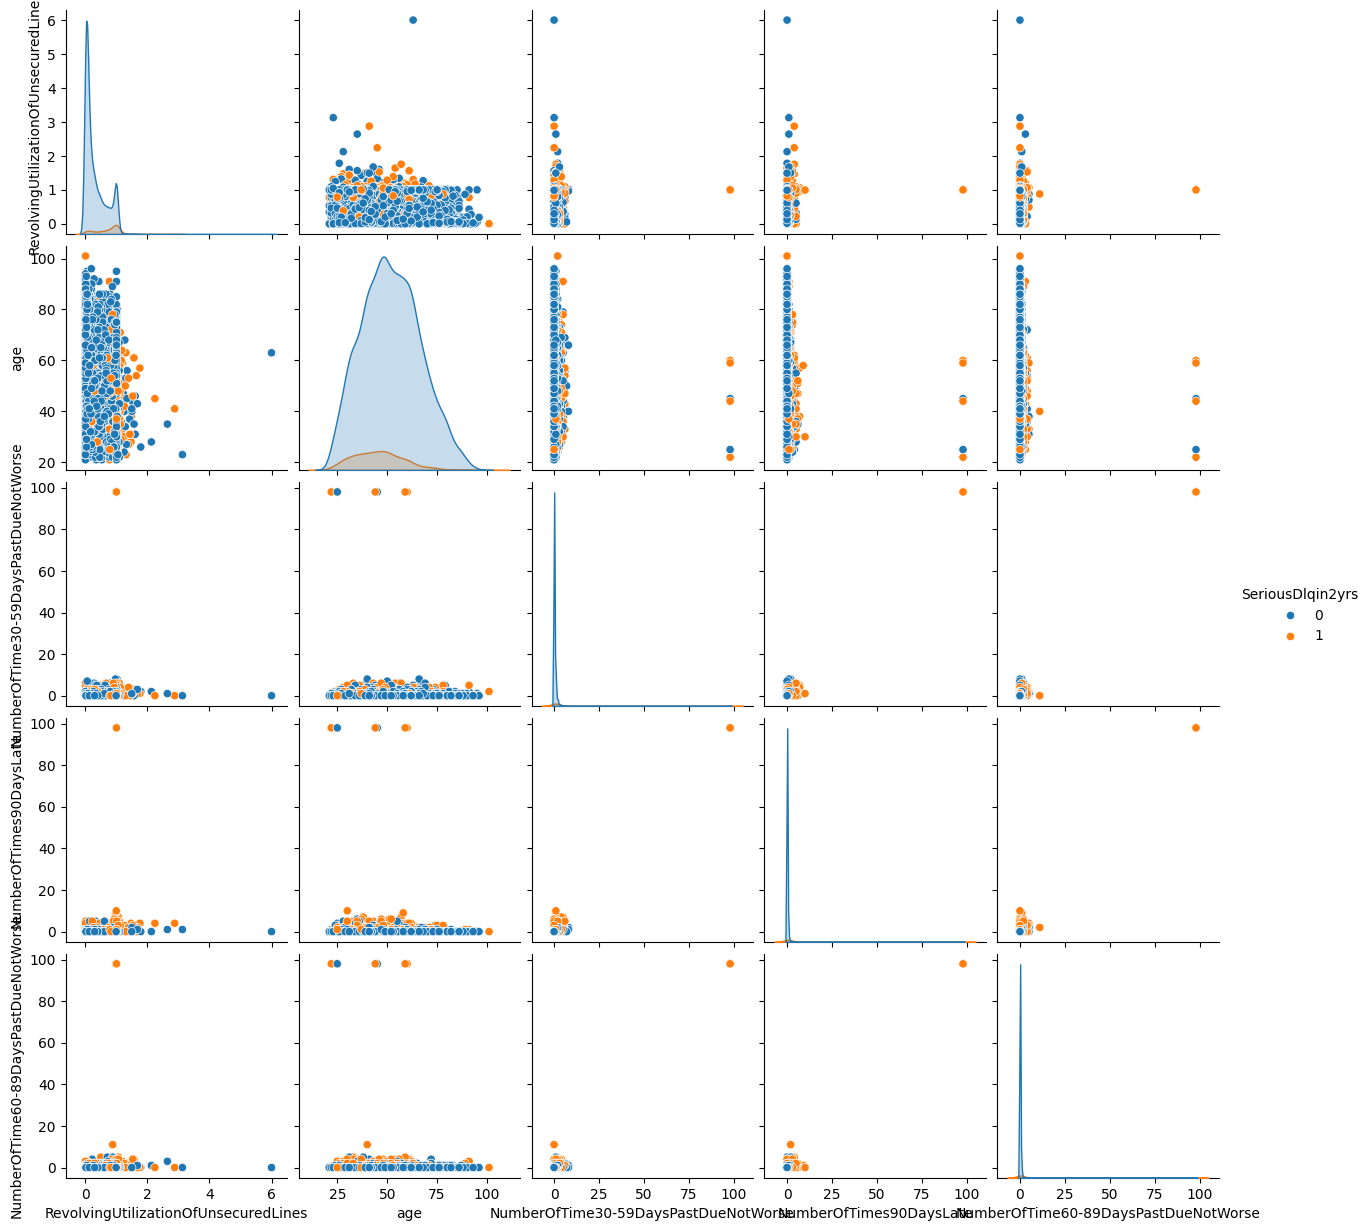

In [72]:
sns.pairplot(df_corr[[col for col in df_corr.columns ]], hue = "SeriousDlqin2yrs")

array([[<Axes: title={'center': 'RevolvingUtilizationOfUnsecuredLines'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'NumberOfTime30-59DaysPastDueNotWorse'}>],
       [<Axes: title={'center': 'DebtRatio'}>,
        <Axes: title={'center': 'NumberOfOpenCreditLinesAndLoans'}>,
        <Axes: title={'center': 'NumberOfTimes90DaysLate'}>],
       [<Axes: title={'center': 'NumberRealEstateLoansOrLines'}>,
        <Axes: title={'center': 'NumberOfTime60-89DaysPastDueNotWorse'}>,
        <Axes: >]], dtype=object)

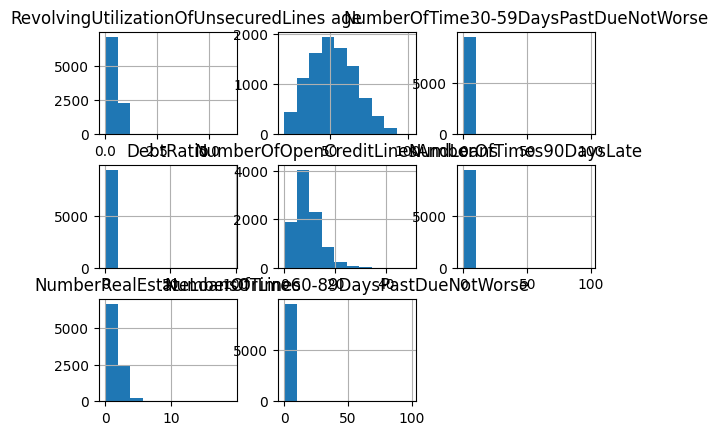

In [74]:
X_train.hist()

In [76]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,9452.0,0.335207,0.362233,0.0,0.034869,0.179211,0.587533,6.0
age,9452.0,51.491536,14.499298,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,9452.0,0.343314,2.930489,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,9452.0,0.486047,2.505031,0.0,0.146204,0.297564,0.477876,96.0
NumberOfOpenCreditLinesAndLoans,9452.0,8.794647,5.139555,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,9452.0,0.180279,2.889984,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,9452.0,1.064325,1.148156,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,9452.0,0.152772,2.870119,0.0,0.000000,0.000000,0.000000,98.0


In [135]:
#ajustamos X_test para que tenga las mismas features que train.

X_test = X_test[X_train.columns].copy()

In [144]:
#creamos los 3 modelos

log_reg = LogisticRegression(max_iter = 5000, random_state = 42)

log_reg.fit(X_train, y_train)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()



D:\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [137]:
#hacemos la validacion cruzada

lg_vc = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='recall_macro')
rf_vc = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall_macro')
knn_vc = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall_macro')

D:\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Lib\site-packages\skl

In [145]:
acc_train = round(accuracy_score(log_reg.predict(X_train), y_train), 3)
acc_test = round(accuracy_score(log_reg.predict(X_test), y_test), 3)
print("Acc train:", acc_train)
print("Acc test:", acc_test)

Acc train: 0.933
Acc test: 0.931


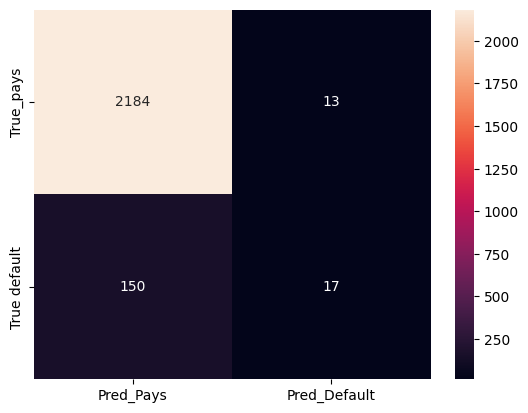

In [146]:
c_matrix = confusion_matrix(y_test, log_reg.predict(X_test))

c_matrix_df = pd.DataFrame(c_matrix, columns = ["Pred_Pays", "Pred_Default"], index = ["True_pays", "True default"])

sns.heatmap(c_matrix_df, annot = True, fmt = "g");

In [147]:
#vemos el informe

print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2197
           1       0.57      0.10      0.17       167

    accuracy                           0.93      2364
   macro avg       0.75      0.55      0.57      2364
weighted avg       0.91      0.93      0.91      2364



In [138]:
#resultados de la validacion cruzada
print(f'log_reg - Recall Medio: {lg_vc.mean()}')
print(f'Random Forest - Recall Medio: {rf_vc.mean()}')
print(f'KNN - Recall Medio: {knn_vc.mean()}')

log_reg - Recall Medio: 0.5407468861932487
Random Forest - Recall Medio: 0.5947831300242564
KNN - Recall Medio: 0.5022347601856045


In [139]:
# Entrenar el modelo usando random forest
rf.fit(X_train, y_train)

# Prediccion
y_predict = rf.predict(X_test)

# Imprimir el informe 
print("Rendimiento con hiperparametros por defecto:")
print(classification_report(y_test, y_predict))



D:\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Rendimiento con hiperparametros por defecto:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2197
           1       0.48      0.12      0.19       167

    accuracy                           0.93      2364
   macro avg       0.71      0.55      0.58      2364
weighted avg       0.90      0.93      0.91      2364



In [140]:
#presentar matriz de confusion.
print("Matriz de Confusion:")
print(confusion_matrix(y_test, y_predict))

Matriz de Confusion:
[[2175   22]
 [ 147   20]]
